<a href="https://colab.research.google.com/github/Dannie401/CODE-KATA/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
df = pd.read_csv('/content/drive/MyDrive/데이터 분석/최종 프로젝트/amazon_products_sales_data_uncleaned.csv')

In [346]:
# 기본 정보
print(df.shape)  # 행, 열 개수


(42675, 16)


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [348]:
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [349]:
df.isnull().sum()

,0
title,0
rating,1024
number_of_reviews,1024
bought_in_last_month,3217
current/discounted_price,11749
price_on_variant,0
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0


In [350]:
df.duplicated().sum()

np.int64(0)

In [351]:
df.nunique()

,0
title,8808
rating,31
number_of_reviews,4413
bought_in_last_month,59
current/discounted_price,2576
price_on_variant,3466
listed_price,911
is_best_seller,12
is_sponsored,2
is_couponed,42


네! 추측하신 내용 정리해드릴게요:

## 📋 전처리 계획 (확인 필요한 추측들)

### 1. 데이터 타입 변환
- **rating**: `"4.6 out of 5 stars"` → `4.6` (float)
- **number_of_reviews**: 텍스트 → int
- **bought_in_last_month**: `"300+ bought in past month"` → `300` 또는 `300+` (int)
- **current/discounted_price**: float 변환
- **price_on_variant**: `"basic variant price: $162.24"` → `162.24` (float)
  - ⚠️ `2.4GHz`, `nan` 같은 이상치/결측치 확인 필요
- **listed_price**: `"$159.00"` → `159.00` (float), `"No Discount"` → `NaN`
- **delivery_details**: 텍스트 날짜 → 숫자형 날짜 변환
- **collected_at**: datetime 변환

### 2. 불린(Boolean) 변환
- **is_best_seller**: `"Best Seller"` / `"No Badge"` 2가지만 있는지 확인 → True/False
- **is_sponsored**: `"Sponsored"` / `"Organic"` 2가지만 있는지 확인 → True/False

### 3. 확인 필요
- **is_couponed**: 할인율만? 할인액도? → 유형 확인 후 처리 방법 결정
- **buy_box_availability**: 이게 뭔지 모르겠음 → 데이터 확인 필요
- **sustainability_badges**: 어떤 유형들이 있는지 확인

### 4. 결측치 해석
- **rating(1024) = number_of_reviews(1024)**: 아직 리뷰 없는 신상품
- **bought_in_last_month(3217)**: 구매 이력 없음
- **current/discounted_price(11749)**: 문제 있는 데이터? 확인 필요
- **buy_box_availability(14653)**: 의미 모름
- **delivery_details(11720)**: 배송 시작일 불명확?
- **sustainability_badges(39267)**: 뱃지 없는 제품
- **product_url(2069)**: 상품 페이지 없다는 건데... 뭐지?



## 확인 필요

In [352]:
# 쿠폰 유형 확인
df['is_couponed'].value_counts().head(100)

,count
is_couponed,
No Coupon,40727
Save $16.00 with coupon,438
Save 15% with coupon,398
Save 10% with coupon,218
Save 5% with coupon,191
Save 50% with coupon,123
Save $11.00 with coupon,120
Save $100.00 with coupon,97
Save 40% with coupon,96


In [353]:
df['is_couponed'].nunique()

42

In [354]:
df[~df['is_couponed'].str.contains('%', na=False)]['is_couponed'].nunique()

30

In [355]:
df[df['is_couponed'].str.contains('%', na=False)]['is_couponed'].nunique()

12

쿠폰 유형은 금액과 할인율(%) 두가지 유형이 있고  
총 쿠폰 유형 개수는 42개 이고  
할인액 쿠폰 30개/할인율 쿠폰  12


**쿠폰 유무+ 쿠폰금액/비율 별로 컬럼으로 분리?**

In [356]:
# buy_box_availability 확인

df['buy_box_availability'].unique()

array(['Add to cart', nan], dtype=object)

-> 카트 추가랑 nan이 있는데 그럼 카트 추가가 기본이 아닌건가?

In [357]:
df['sustainability_badges'].unique()

array(['Carbon impact', nan, 'Energy efficiency',
       'Safer chemicals +1 more', 'Small Business',
       '1 sustainability certification', 'Works with Alexa',
       'Manufacturing practices', 'Forestry practices', 'Alexa Built-in',
       'Energy efficiency +3 more', 'Recycled materials',
       'Safer chemicals +2 more', 'Energy efficiency +1 more',
       'Recycled materials +3 more', 'Recycled materials +2 more',
       'Made in Italy'], dtype=object)

In [358]:
df['sustainability_badges'].value_counts()

,count
sustainability_badges,
Small Business,1341
Carbon impact,769
Works with Alexa,425
Energy efficiency,262
Alexa Built-in,184
Manufacturing practices,148
Energy efficiency +3 more,121
Energy efficiency +1 more,93
Forestry practices,18


In [359]:
df['sustainability_badges'].nunique()

16

-> 제품에 붙어 있는 친환경이나 기타 특징라벨? 소상공인,에너지효율, 알렉사 연동 제품인지 등등,,

In [360]:
df['product_url']

,product_url
0,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...
1,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...
2,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...
3,/Apple-Cancellation-Transparency-Personalized-...
4,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...
...,...
42670,/Elgato-4K-Pro-Internal-Capture/dp/B0DLR3WQWR/...
42671,/Arlo-Essential-Spotlight-Camera-Surveillance/...
42672,/GIGABYTE-FO32U2-32-3840x2160-240Hz-FreeSync-A...
42673,/Monoprice-XLR-Male-4-Inch-Cable/dp/B001UJEKZ6...


In [361]:
df['is_best_seller'].value_counts()

,count
is_best_seller,
No Badge,40814
Amazon's,744
Limited time deal,409
Best Seller,275
Save 30%,125
Ends in,97
Save 10%,61
Save 18%,57
Save 17%,51


In [362]:
df['is_best_seller'].nunique()

12

-> 베스트 셀러 뱃지 유형이아니라 프로모션 뱃지 유형으로 보임



In [363]:
df['is_sponsored'].value_counts()

,count
is_sponsored,
Organic,35664
Sponsored,7011


-> 이건 불린 형식으로 바꿔도 될 듯

## 결측치 확인

In [364]:
df[df['rating'].isna()]

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
854,Buffalo Games - Gold - Eric Dowdle - Golden Ga...,NaN,NaN,50+ bought in past month,12.00,basic variant price: nan,No Discount,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/81IhN+yhrY...,/sspa/click?ie=UTF8&spc=MTo0MzMzMTM1MzExOTMwNj...,2025-08-21 11:21:25
1857,"Lenovo ThinkPad X1 Carbon Gen 13 Aura Edition,...",NaN,NaN,200+ bought in past month,"2,098.00","basic variant price: $1,895.00","$2,549.00",No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61JZTWfKMR...,/Lenovo-ThinkPad-Carbon-Intel-Camera/dp/B0DQ4C...,2025-08-21 11:28:55
2599,FEELWORLD F7 Plus Camera Field Touchscreen Mon...,NaN,NaN,NaN,165.00,basic variant price: nan,No Discount,No Badge,Sponsored,No Coupon,Add to cart,Delivery Aug 29 - Sep 2,NaN,https://m.media-amazon.com/images/I/717PLQhkhK...,/sspa/click?ie=UTF8&spc=MTo0MjY2ODkzNzQ4MzA2MT...,2025-08-21 11:33:52
2600,FEELWORLD P6XL Camera Field Touchscreen Monito...,NaN,NaN,Typical:,165.00,basic variant price: nan,$199.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/714Z4DIJDM...,/sspa/click?ie=UTF8&spc=MTo0MjY2ODkzNzQ4MzA2MT...,2025-08-21 11:33:52
3481,FEELWORLD 4K10X PTZ Camera 4K Resolution 10X U...,NaN,NaN,List:,299.99,basic variant price: nan,$369.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61AL4I0eBx...,/sspa/click?ie=UTF8&spc=MTo1NDA3NTc1Njk1MDMwMj...,2025-08-21 11:40:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42545,acer 2-Pack Laptop Privacy Screen - for Laptop...,NaN,NaN,List:,49.99,basic variant price: nan,$59.99,No Badge,Sponsored,Save 40% with coupon,Add to cart,"Delivery Thu, Sep 11",NaN,https://m.media-amazon.com/images/I/71-Vlh1PP7...,/sspa/click?ie=UTF8&spc=MToyMDA5NDQ0MTc3MjY0OT...,2025-08-30 19:54:27
42587,acer 2-Pack Laptop Privacy Screen - for Laptop...,NaN,NaN,List:,49.99,basic variant price: nan,$59.99,No Badge,Sponsored,Save 40% with coupon,Add to cart,"Delivery Thu, Sep 11",NaN,https://m.media-amazon.com/images/I/71-Vlh1PP7...,/sspa/click?ie=UTF8&spc=MTo3MDEyODUwNjY3MjEwNj...,2025-08-30 19:54:52
42605,GIGABYTE B860 Eagle WIFI6E Intel Core Ultra (S...,NaN,NaN,50+ bought in past month,119.99,basic variant price: nan,$179.99,Limited time deal,Organic,No Coupon,Add to cart,"FREE delivery Thu, Sep 4Or fastest delivery Mo...",NaN,https://m.media-amazon.com/images/I/81U+SuxDL9...,/GIGABYTE-B860-WIFI6E-Motherboard-EZ-Latch/dp/...,2025-08-30 19:55:04
42629,GIGABYTE B860 Eagle WIFI6E Intel Core Ultra (S...,NaN,NaN,50+ bought in past month,119.99,basic variant price: nan,$179.99,Limited time deal,Organic,No Coupon,Add to cart,"FREE delivery Thu, Sep 4Or fastest delivery Mo...",NaN,https://m.media-amazon.com/images/I/81U+SuxDL9...,/GIGABYTE-B860-WIFI6E-Motherboard-EZ-Latch/dp/...,2025-08-30 19:55:28


-> 판매량이 있긴 한데, 50개 이상 판매량으로 그치는 거 같음


In [365]:
df[~df['bought_in_last_month'].str.contains('bought in past month',na=False)]['bought_in_last_month'].value_counts()

,count
bought_in_last_month,
No featured offers available,4571
More Buying Choices,654
Typical:,532
List:,518
List Price:,511
Shop products from small business brands sold in Amazon’s store. Discover more about the small businesses partnering with Amazon and Amazon’s commitment to empowering them.,262
ESRB Rating: Everyone,107
This product is certified by Amazon to work with Alexa. This product can be controlled with your voice through Alexa-enabled devices such as Amazon Echo and Amazon Tap.,47
($766.33$766.33/in),29


In [366]:
df[~df['bought_in_last_month'].str.contains('bought in past month',na=False)]['bought_in_last_month'].count()

np.int64(7294)

bought_in_last_month 오염이 7294행이 오염되어 있음 약 17%  오염 행을 Nan처리
하거나 필요에 따라 다른 용도 데이터로 분리

In [367]:
df['current/discounted_price']

,current/discounted_price
0,89.68
1,9.99
2,314.00
3,NaN
4,NaN
...,...
42670,195.99
42671,89.99
42672,899.99
42673,10.39


In [368]:
df[df['current/discounted_price'].isna()]

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29
5,Texas Instruments TI-84 Plus CE Color Graphing...,4.6 out of 5 stars,"44,522",100K+ bought in past month,NaN,basic variant price: $99.95,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/71AyPChhFd...,/Texas-Instruments-TI-84-Graphing-Calculator/d...,2025-08-21 11:14:29
6,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",4.5 out of 5 stars,"13,466",10K+ bought in past month,NaN,basic variant price: $88.11,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61iBtxCUab...,/Apple-Bluetooth-Headphones-Personalized-Effor...,2025-08-21 11:14:29
7,Apple AirTag. Keep Track of and find Your Keys...,4.6 out of 5 stars,"38,105",10K+ bought in past month,NaN,basic variant price: $23.04,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/71rP7f78eF...,/Apple-MX532LL-A-AirTag/dp/B0CWXNS552/ref=sr_1...,2025-08-21 11:14:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42595,"Microsoft Surface Laptop Studio 2 14.4"" Touchs...",5.0 out of 5 stars,1,No featured offers available,NaN,"basic variant price: $1,799.99",No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61LMopCIyT...,/Microsoft-Touchscreen-Convertible-Floating-No...,2025-08-30 19:54:52
42597,"Harman Kardon Onyx Studio 8 (Renewed), Black",4.4 out of 5 stars,274,100+ bought in past month,NaN,basic variant price: nan,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/71RJ+a-sN2...,/Harman-Kardon-Studio-Renewed-Black/dp/B0BX76S...,2025-08-30 19:54:52
42617,Sprayground PACMAN GHOST GANG SHARMOUTH,4.9 out of 5 stars,19,300+ bought in past month,NaN,basic variant price: $126.70,No Discount,No Badge,Organic,No Coupon,NaN,NaN,Small Business,https://m.media-amazon.com/images/I/61ruhT+eIc...,/Sprayground-PACMAN-GHOST-GANG-SHARMOUTH/dp/B0...,2025-08-30 19:55:04
42641,Sprayground PACMAN GHOST GANG SHARMOUTH,4.9 out of 5 stars,19,300+ bought in past month,NaN,basic variant price: $126.70,No Discount,No Badge,Organic,No Coupon,NaN,NaN,Small Business,https://m.media-amazon.com/images/I/61ruhT+eIc...,/Sprayground-PACMAN-GHOST-GANG-SHARMOUTH/dp/B0...,2025-08-30 19:55:28


bought_in_last_month
100+ bought in past month                                                                                                                                                       8801
50+ bought in past month                                                                                                                                                        5967
200+ bought in past month                                                                                                                                                       5645
No featured offers available                                                                                                                                                    4571
300+ bought in past month                                                                                                                                                       2842
500+ bought in past month                                                 

<Axes: >

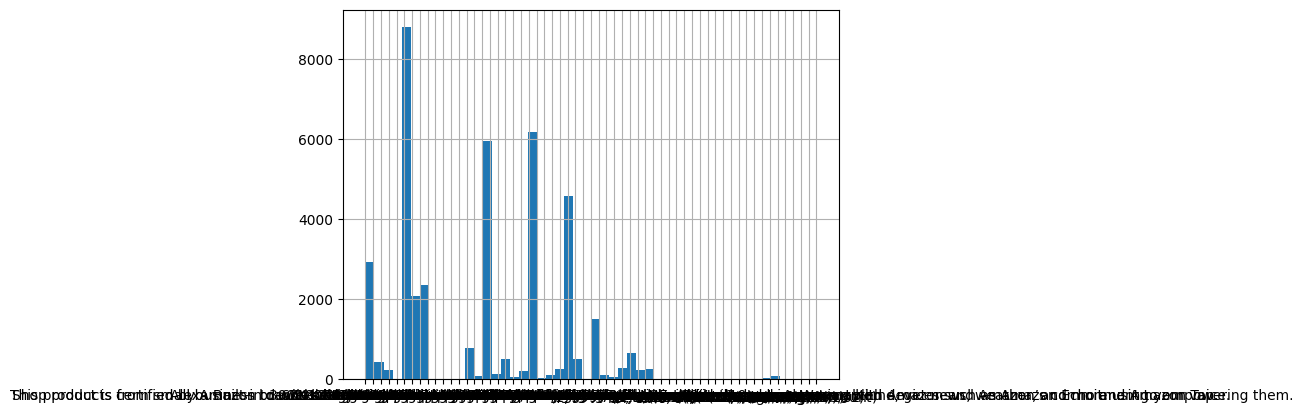

In [369]:
# 1. 값들이 정말 반올림되어 있나?
print(df['bought_in_last_month'].value_counts().head(30))

# 2. 분포가 자연스러운가?
df['bought_in_last_month'].hist(bins=50)

# 3. "50+", "100+", "500+" 같은 표기는 없나?
# 원본 데이터 샘플 확인

## 수치형 변환

rating: 4.6 out of 5 stars -> 4.6 (실수)  
number_of_reviews: object -> int  
current/discounted_price: 달러159.00 -> int ? float?  
listed_price: $159.00 -> int ? float?, No Discount -> Nan  
price_on_variant: 텍스트 제거 후 숫자 추출, 이상치 처리

In [370]:

df['rating'] = df['rating'].str.replace(" out of 5 stars", "", regex=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print(f"✅ rating 완료: {df['rating'].notna().sum():,}개")

✅ rating 완료: 41,651개


In [371]:
df['rating'].value_counts()

,count
rating,
4.6,6151
4.4,5525
4.5,5359
4.7,4664
4.8,4230
4.3,2927
4.2,2837
4.1,1959
4.0,1465


In [372]:
df['rating'].dtype

dtype('float64')

In [373]:
# number_of_reviews
df['number_of_reviews']

,number_of_reviews
0,375
1,"2,457"
2,"3,044"
3,"35,882"
4,"28,988"
...,...
42670,1
42671,20
42672,57
42673,"7,102"


In [374]:
df['number_of_reviews'] = df['number_of_reviews'].astype(str).str.replace(',', '')
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')

df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)

In [375]:
df['number_of_reviews'].describe()

,number_of_reviews
count,42675.000000
mean,3013.029924
std,12881.838410
min,0.000000
25%,75.000000
50%,335.000000
75%,1825.500000
max,865598.000000


In [376]:
df['current/discounted_price'] = df['current/discounted_price'].astype(str).str.replace(',', '')
df['current/discounted_price'] = pd.to_numeric(df['current/discounted_price'], errors='coerce')

df['current/discounted_price'] = df['current/discounted_price'].fillna(0)
df['current/discounted_price'] = df['current/discounted_price'].astype(float)

In [377]:
df['current/discounted_price'].describe()

,current/discounted_price
count,42675.000000
mean,154.073866
std,345.223608
min,0.000000
25%,0.000000
50%,31.050000
75%,129.990000
max,4699.000000


In [378]:
df['listed_price']

,listed_price
0,$159.00
1,$15.99
2,$349.00
3,No Discount
4,No Discount
...,...
42670,No Discount
42671,No Discount
42672,"$1,099.99"
42673,$15.98


In [379]:
df['listed_price'].describe()

,listed_price
count,42675
unique,911
top,No Discount
freq,30364


In [380]:
replace_map = {
    r'\$': '',
    'No Discount': ''
}
df['listed_price'] = df['listed_price'].astype(str).replace(replace_map, regex=True)

df['listed_price'] = pd.to_numeric(df['listed_price'], errors='coerce')

df['listed_price'] = df['listed_price'].fillna(0)


In [381]:
df['listed_price'].describe()


,listed_price
count,42675.000000
mean,33.854798
std,98.579988
min,0.000000
25%,0.000000
50%,0.000000
75%,16.610000
max,999.990000


In [382]:
df['listed_price']

,listed_price
0,159.00
1,15.99
2,349.00
3,0.00
4,0.00
...,...
42670,0.00
42671,0.00
42672,0.00
42673,15.98


In [383]:
df['price_on_variant']

,price_on_variant
0,basic variant price: 2.4GHz
1,basic variant price: nan
2,basic variant price: nan
3,basic variant price: $162.24
4,basic variant price: $72.74
...,...
42670,basic variant price: nan
42671,basic variant price: $25.00 off coupon applied
42672,basic variant price: Lowest price in 30 days
42673,basic variant price: nan


In [384]:
df['price_on_variant'] = df['price_on_variant'].str.replace("basic variant price: ", "", regex=False)

In [385]:
df['price_on_variant'].nunique()

3466

In [386]:
# 어떤 패턴들이 있는지 확인
print("price_on_variant 고유값 샘플 (상위 50개):")
print(df['price_on_variant'].value_counts().head(50))

# 달러 표시 없는 것들만 확인
no_dollar = df[~df['price_on_variant'].str.contains('$', na=False)]['price_on_variant']
print(f"\n달러 표시 없는 값들 ({len(no_dollar)}개):")
print(no_dollar.value_counts().head(50))

price_on_variant 고유값 샘플 (상위 50개):
price_on_variant
nan                        21031
16 Count (Pack of 1)         582
$9.99                        324
$119.95                      298
$169.99                      264
$29.99                       217
$349.00                      211
$5.00                        209
$59.24                       205
$216.66                      204
$3.98                        204
$352.12                      204
$20.63                       204
$224.00                      204
$19.82                       202
$3,797.85                    200
$57.17                       195
$201.02                      193
$66.99                       182
$6.99                        177
$21.21                       175
$217.58                      170
Lowest price in 30 days      168
$13.99                       159
$73.99                       156
$33.99                       154
$337.00                      153
$47.03                       152
$149.95                  

In [387]:
# price_on_variant 패턴

# 달러 표시 있는 것 vs 없는 것
has_dollar = df['price_on_variant'].str.contains('\$', na=False, regex=True)
print(f"$ 포함: {has_dollar.sum():,}개 ({has_dollar.sum()/len(df)*100:.1f}%)")
print(f"$ 없음: {(~has_dollar & df['price_on_variant'].notna()).sum():,}개")
print(f"결측치: {df['price_on_variant'].isna().sum():,}개")

# $ 없는 값들 확인
no_dollar_values = df[~has_dollar & df['price_on_variant'].notna()]['price_on_variant'].value_counts()
print(f"\n$ 없는 값들 (상위 20개):")
print(no_dollar_values.head(20))

$ 포함: 20,071개 (47.0%)
$ 없음: 22,604개
결측치: 0개

$ 없는 값들 (상위 20개):
price_on_variant
nan                        21031
16 Count (Pack of 1)         582
Lowest price in 30 days      168
USB                          146
3 Count (Pack of 1)           81
XLR                           79
4 Count (Pack of 2)           79
Wired                         73
25 Count (Pack of 3)          65
10% off coupon applied        51
2.4GHz Wireless               21
1 Count (Pack of 1)           20
2 Count (Pack of 1)           18
15% off coupon applied        13
4 Count (Pack of 1)           12
24 Count (Pack of 1)          11
8 Count (Pack of 1)           10
12 Count (Pack of 1)          10
Auxiliary                      9
5 Count (Pack of 1)            7
Name: count, dtype: int64


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2558037596.py:4: SyntaxWarning: invalid escape sequence '\$'
  has_dollar = df['price_on_variant'].str.contains('\$', na=False, regex=True)


In [388]:
# 1. "$ + 숫자" 패턴 중에서 이상한 것들 찾기
dollar_values = df[df['price_on_variant'].str.contains('\$', na=False, regex=True)]['price_on_variant'].value_counts()

print("$ 포함 값들 (상위 30개):")
print(dollar_values.head(30))

# 2. 특히 "off" 포함된 것들 (쿠폰일 가능성)
has_off = df['price_on_variant'].str.contains('off', na=False, case=False)
print(f"\n'off' 포함된 값들: {has_off.sum():,}개")
print(df[has_off]['price_on_variant'].value_counts().head(20))

# 3. 실제 샘플 확인
print("\n샘플 제품들:")
sample = df[df['price_on_variant'].str.contains('\$.*off', na=False, case=False, regex=True)].head(5)
print(sample[['title', 'price_on_variant', 'current/discounted_price', 'is_couponed']])

$ 포함 값들 (상위 30개):
price_on_variant
$9.99        324
$119.95      298
$169.99      264
$29.99       217
$349.00      211
$5.00        209
$59.24       205
$3.98        204
$352.12      204
$20.63       204
$224.00      204
$216.66      204
$19.82       202
$3,797.85    200
$57.17       195
$201.02      193
$66.99       182
$6.99        177
$21.21       175
$217.58      170
$13.99       159
$73.99       156
$33.99       154
$337.00      153
$47.03       152
$149.95      152
$7.24        151
$19.10       151
$549.99      151
$599.95      151
Name: count, dtype: int64

'off' 포함된 값들: 325개
price_on_variant
$100.00 off coupon applied    97
$25.00 off coupon applied     63
10% off coupon applied        51
$69.00 off coupon applied     31
$16.00 off coupon applied     26
$33.00 off coupon applied     13
15% off coupon applied        13
$45.00 off coupon applied      5
40% off coupon applied         4
Office                         4
20% off coupon applied         4
$11.00 off coupon applied    

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-324385530.py:2: SyntaxWarning: invalid escape sequence '\$'
  dollar_values = df[df['price_on_variant'].str.contains('\$', na=False, regex=True)]['price_on_variant'].value_counts()
/tmp/ipython-input-324385530.py:14: SyntaxWarning: invalid escape sequence '\$'
  sample = df[df['price_on_variant'].str.contains('\$.*off', na=False, case=False, regex=True)].head(5)


In [389]:
import re
import numpy as np

def clean_price_on_variant_final(text):
    """
    price_on_variant에서 순수 가격만 추출
    - 쿠폰 정보 제외 (is_couponed와 중복)
    - 수량/옵션 정보 제외
    - 프로모션 문구 제외
    """
    if pd.isna(text) or text == 'nan':
        return np.nan

    text = str(text).strip()

    # 1. 제외 패턴: 쿠폰 (is_couponed와 중복)
    if 'off coupon' in text.lower() or 'coupon applied' in text.lower():
        return np.nan

    # 2. 제외 패턴: 프로모션 문구
    if 'lowest price' in text.lower():
        return np.nan

    # 3. 제외 패턴: 수량/옵션 정보
    option_keywords = ['count', 'pack', 'usb', 'xlr', 'wired', 'wireless',
                       'auxiliary', 'ghz', 'office']
    if any(keyword in text.lower() for keyword in option_keywords):
        return np.nan

    # 4. 순수 가격 패턴 추출
    # 패턴 1: "$9.99" (가장 흔함)
    if re.match(r'^\$[\d,]+\.?\d*$', text):
        price_str = text.replace('$', '').replace(',', '')
        try:
            return float(price_str)
        except:
            return np.nan

    # 패턴 2: "basic variant price: $162.24"
    match = re.search(r'price:\s*\$([\d,]+\.?\d*)', text, re.IGNORECASE)
    if match:
        price_str = match.group(1).replace(',', '')
        try:
            return float(price_str)
        except:
            return np.nan

    # 그 외는 모두 NaN
    return np.nan

# 적용
print("=" * 80)
print("price_on_variant 최종 정제")
print("=" * 80)

df['price_on_variant_clean'] = df['price_on_variant'].apply(clean_price_on_variant_final)

# 결과 확인
print(f"\n✅ 유효한 가격: {df['price_on_variant_clean'].notna().sum():,}개 ({df['price_on_variant_clean'].notna().sum()/len(df)*100:.1f}%)")
print(f"❌ NaN 처리: {df['price_on_variant_clean'].isna().sum():,}개 ({df['price_on_variant_clean'].isna().sum()/len(df)*100:.1f}%)")

print(f"\n가격 통계:")
print(f"  평균: ${df['price_on_variant_clean'].mean():.2f}")
print(f"  중앙값: ${df['price_on_variant_clean'].median():.2f}")
print(f"  최소: ${df['price_on_variant_clean'].min():.2f}")
print(f"  최대: ${df['price_on_variant_clean'].max():,.2f}")
print(f"  표준편차: ${df['price_on_variant_clean'].std():.2f}")

# 이상치 확인
print(f"\n이상치 체크:")
print(f"  $1 미만: {(df['price_on_variant_clean'] < 1).sum():,}개")
print(f"  $5,000 초과: {(df['price_on_variant_clean'] > 5000).sum():,}개")

# NaN 처리된 원본 값 확인 (검증용)
removed = df[df['price_on_variant'].notna() & df['price_on_variant_clean'].isna()]['price_on_variant'].value_counts()
print(f"\nNaN으로 처리된 값들 (상위 15개 - 검증용):")
print(removed.head(15))

# 최종 검증: 쿠폰 정보가 제대로 제거됐는지
coupon_check = df[df['price_on_variant_clean'].notna() & df['price_on_variant'].str.contains('coupon', na=False, case=False)]
print(f"\n⚠️ 검증: 쿠폰 정보 남은 것: {len(coupon_check)}개 (0개여야 정상)")
if len(coupon_check) > 0:
    print("문제 발견! 샘플:")
    print(coupon_check[['price_on_variant', 'price_on_variant_clean']].head())

price_on_variant 최종 정제

✅ 유효한 가격: 19,825개 (46.5%)
❌ NaN 처리: 22,850개 (53.5%)

가격 통계:
  평균: $235.45
  중앙값: $79.22
  최소: $2.16
  최대: $5,449.00
  표준편차: $512.01

이상치 체크:
  $1 미만: 0개
  $5,000 초과: 1개

NaN으로 처리된 값들 (상위 15개 - 검증용):
price_on_variant
nan                           21031
16 Count (Pack of 1)            582
Lowest price in 30 days         168
USB                             146
$100.00 off coupon applied       97
3 Count (Pack of 1)              81
XLR                              79
4 Count (Pack of 2)              79
Wired                            73
25 Count (Pack of 3)             65
$25.00 off coupon applied        63
10% off coupon applied           51
$69.00 off coupon applied        31
$16.00 off coupon applied        26
2.4GHz Wireless                  21
Name: count, dtype: int64

⚠️ 검증: 쿠폰 정보 남은 것: 0개 (0개여야 정상)


In [390]:
df['price_on_variant'].head(30)

,price_on_variant
0,2.4GHz
1,nan
2,nan
3,$162.24
4,$72.74
5,$99.95
6,$88.11
7,$23.04
8,nan
9,$284.05


In [391]:
print("=" * 80)
print("price_on_variant 최종 정리")
print("=" * 80)

# 현재 상태 확인
print(f"\n현재 타입: {df['price_on_variant'].dtype}")
print(f"샘플 값:")
print(df['price_on_variant'].head(10))

# price_on_variant_clean이 이미 있다면
if 'price_on_variant_clean' in df.columns:
    # 원본 백업
    df['price_on_variant_original'] = df['price_on_variant']

    # 정제된 숫자형 값으로 교체
    df['price_on_variant'] = df['price_on_variant_clean']

    # clean 컬럼 삭제
    df.drop('price_on_variant_clean', axis=1, inplace=True)

    print(f"\n✅ 변환 완료!")
    print(f"  • 타입: {df['price_on_variant'].dtype}")
    print(f"  • 유효 값: {df['price_on_variant'].notna().sum():,}개")
    print(f"  • NaN: {df['price_on_variant'].isna().sum():,}개")

    # 이상치 확인
    print(f"\n이상치 체크:")
    print(f"  • $0 이하: {(df['price_on_variant'] <= 0).sum()}개")
    print(f"  • $10,000 초과: {(df['price_on_variant'] > 10000).sum()}개")

    # 이상치 처리 (필요시)
    outliers = (df['price_on_variant'] <= 0) | (df['price_on_variant'] > 10000)
    if outliers.sum() > 0:
        print(f"\n  ⚠️  이상치 {outliers.sum()}개 발견!")
        print(f"  샘플: {df[outliers]['price_on_variant'].values}")

        # NaN 처리
        df.loc[outliers, 'price_on_variant'] = np.nan
        print(f"  ✅ NaN 처리 완료")

    print(f"\n최종 통계:")
    print(df['price_on_variant'].describe())

else:
    print("⚠️  price_on_variant_clean 컬럼이 없습니다!")
    print("정제를 먼저 해주세요.")

# 최종 확인
print(f"\n현재 price_on_variant 상태:")
print(f"  타입: {df['price_on_variant'].dtype}")
print(f"  유효 값: {df['price_on_variant'].notna().sum():,}개")

price_on_variant 최종 정리

현재 타입: object
샘플 값:
0     2.4GHz
1        nan
2        nan
3    $162.24
4     $72.74
5     $99.95
6     $88.11
7     $23.04
8        nan
9    $284.05
Name: price_on_variant, dtype: object

✅ 변환 완료!
  • 타입: float64
  • 유효 값: 19,825개
  • NaN: 22,850개

이상치 체크:
  • $0 이하: 0개
  • $10,000 초과: 0개

최종 통계:
count    19825.000000
mean       235.452497
std        512.006869
min          2.160000
25%         25.990000
50%         79.220000
75%        216.660000
max       5449.000000
Name: price_on_variant, dtype: float64

현재 price_on_variant 상태:
  타입: float64
  유효 값: 19,825개


In [392]:
df['price_on_variant'].head(30)

,price_on_variant
0,NaN
1,NaN
2,NaN
3,162.24
4,72.74
5,99.95
6,88.11
7,23.04
8,NaN
9,284.05


In [394]:
# listed_price 정제 (아직 안 했다면)
df['listed_price_clean'] = df['listed_price'].replace('No Discount', np.nan)
df['listed_price_clean'] = pd.to_numeric(
    df['listed_price_clean'].astype(str).str.replace('$', '').str.replace(',', ''),
    errors='coerce'
)

# 그 다음 할인율 계산
df['discount_rate'] = np.where(
    (df['listed_price_clean'].notna()) & (df['listed_price_clean'] > 0),
    (df['listed_price_clean'] - df['current_discounted_price']) / df['listed_price_clean'] * 100,
    np.nan
)

# 확인
print("할인 정보:")
print(f"할인 제품: {df['discount_rate'].notna().sum():,}개 ({df['discount_rate'].notna().mean()*100:.1f}%)")
print(f"평균 할인율: {df['discount_rate'].mean():.1f}%")
print(f"중앙값 할인율: {df['discount_rate'].median():.1f}%")

# 베스트셀러 vs 일반
bestseller = df[df['is_bestseller_bool'] == True]
regular = df[df['is_bestseller_bool'] == False]

print(f"\n베스트셀러:")
print(f"  할인 비율: {bestseller['discount_rate'].notna().mean()*100:.1f}%")
print(f"  평균 할인율: {bestseller['discount_rate'].mean():.1f}%")

print(f"\n일반 제품:")
print(f"  할인 비율: {regular['discount_rate'].notna().mean()*100:.1f}%")
print(f"  평균 할인율: {regular['discount_rate'].mean():.1f}%")

KeyError: 'current_discounted_price'